#<font color='REDBLUE'>**Pevisão do Preço de Diamentes**</font>

## 1° Problema de Negócio

- Queremos Prever o Preço do Diamante de acordo com suas características

Dados obtidos do Kaggle: https://www.kaggle.com/datasets/shivam2503/diamonds

In [1]:
# Bibliotecas 
import os
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Ignorando aletras
import warnings
warnings.filterwarnings('ignore')

# Manter os gráficos nessa pagina
%matplotlib inline

In [2]:
# Fonte de Dados
df = pd.read_csv('/content/diamonds.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# Informações dos campos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


## 2° Análise exploratória dos Dados

In [5]:
# Estatística descritiva
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
# Verificando se há valores ausentes
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [7]:
# Verificando se há valores duplicados
df.duplicated().sum()

0

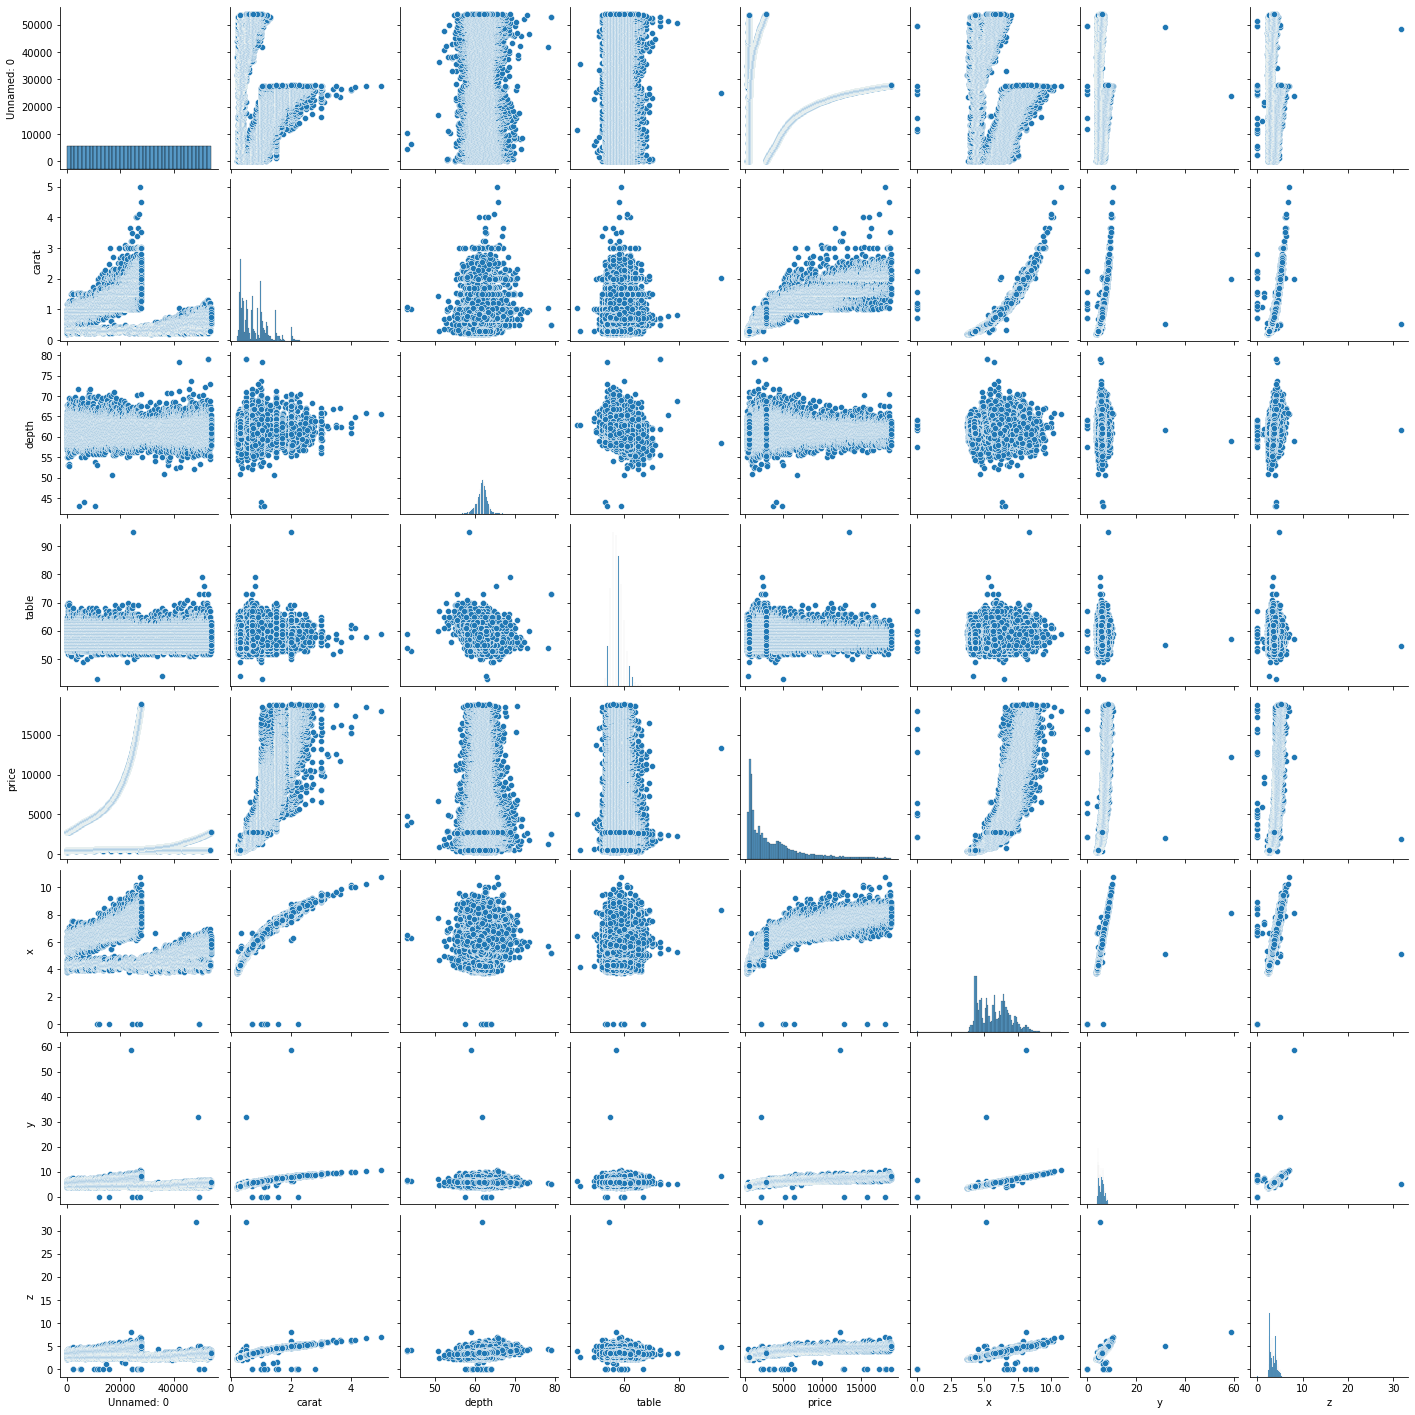

In [8]:
# Explorando a Visualização dos Dados
# Usar o Matplotlib
sns.pairplot(df)

## 3° Pré-Processamento dos Dados

In [10]:
# Dividir o conjunto de dados em 80% de treinamento e 20% de validação
X = df['carat'].values.reshape(-1, 1)
y = df['price'].values.reshape(-1, 1)

In [11]:
# Separando dados em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

##4° Criação da Máquina Preditiva

In [12]:
# Build model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Apply model to test data
y_predict = model.predict(X_test)

y_predict

array([[1854.32859447],
       [4730.28179803],
       [4574.82486811],
       ...,
       [1154.77240982],
       [1621.14319959],
       [4574.82486811]])

## 5° Avaliando o Desempenho da Máquina Preditiva



In [14]:
# Compara valor real e valor predito
real_vs_predito = pd.DataFrame({'Real': y_test.flatten(), 'predito':y_predict.flatten()})
real_vs_predito.sample(10)

,Real,predito
9548,380,144.302365
3426,1321,2009.785524
4367,4118,5585.294913
6455,2461,4808.010263
4726,1212,2087.513989
8395,10730,9393.989696
8603,1781,1698.871665
4517,1316,1621.143200
54,505,222.030830
5431,2666,3331.169429


In [15]:
# Evaluate model - Avaliação da Acurácia do Modelo
print('Acurácia: %.2f' % (model.score(X_test, y_test)*100), '%' )

Acurácia: 84.70 %
